 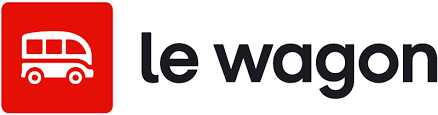

# Get competitor's products and prices info

Naturalia is a health food French company, and one of the main competitors of Greenweez.

In this challenge, you will gather information on Naturalia products to help Greenweez drive its pricing strategy.

## Naturalia website

### BeautifulSoup


Go to the [website](https://www.naturalia.fr/catalogsearch/result/?q=compote) and study the url. What is the endpoint? What is the query parameter ?

endpoint = https://www.naturalia.fr/catalogsearch/result/

parameter q = compote

Using `requests` and `bs4`libraries, convert the html code to a BeautifulSoup object and store it in a `soup`variable.

Have a look at the lecture if you're unsure about the syntax.

In [1]:
import requests 
from bs4 import BeautifulSoup

In [7]:
url = 'https://www.naturalia.fr/catalogsearch/result/'
params = {
    'q': 'compote'
}
response = requests.get(url=url, params=params)

print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


### Investigating the page layout


We want to get information about all the products displayed on the page.

By examining the website's HTML code, determine the HTML tag that contains information for each product.

- li class='item product product-item'
- div class="product attribute description"


Use BeautifulSoup's `find_all()` method to retrieve all **li** tags with the class **item product product-item** and store the results in a variable named `items`.

Have a look at the lecture for guidance.

In [8]:
items = []

for item in soup.find_all('li', class_= "item product product-item"):
    items.append(item)

What is the type of `items`?


In [10]:
type(items[0])

bs4.element.Tag

### Scraping one product information


Store the first item in a variable named `item`.

In [31]:
item = items[0]

HTML can be tough to decipher when reading it in the notebook.

Use your browser's console to identify the HTML tag storing the product information (name and url) of the first item. \
Extract it with BeautifulSoup and store the results in a variable named `item_description`.

In [47]:
item_description = item.find('a', class_='product-item-link')

item_description

<a class="product-item-link" href="https://www.naturalia.fr/produit/compote-fraise-315g">
                                                        Compote Fraise 315g Bio                         </a>

Now extract the name and url from `item_description`and store them in two variables named `item_name` and `item_url`.


In [51]:
item_name = item_description.get_text(strip=True)
item_name

'Compote Fraise 315g Bio'

In [52]:
item_url = item_description['href']
item_url

'https://www.naturalia.fr/produit/compote-fraise-315g'

Repeat the same process to extract the price of the first item, and store it in a variable named `item_price`.


<details>
    <summary>Hint 🔍</summary>

You will be required to do some cleaning with the output, including:
    
- get rid of the unnecessary characters (`strip()`and `replace()` methods can help)
- change the data type

</details>

In [57]:
item_price  = item.find('span', class_='price').text.replace('\xa0€', '')
item_price

'6,02'

### Scraping all products information

We will now repeat the process to gather the information of all the products displayed on the page.

By re-using your previous code, iterate over all the products and create a list of dictionaries containg all the products information (product name, price and url).

Complete the following code and execute it.

In [58]:
import pandas as pd

products = []

# iterate over items
for item in items:

    description = item.find('a', class_='product-item-link')
    
    name = description.get_text(strip=True)
    url = description['href']

    price  = item.find('span', class_='price').text.replace('\xa0€', '')

    product = {
        'Name' : name,
        'Price' : price,
        'Link' : url
    }

    products.append(product)

df = pd.DataFrame(products)
df

,Name,Price,Link
0,Compote Fraise 315g Bio,"6,02",https://www.naturalia.fr/produit/compote-frais...
1,Compote de Pêche allégée 540g Bio,"7,64",https://www.naturalia.fr/produit/compote-peche...
2,Compote de Pêche 725G Bio,"9,13",https://www.naturalia.fr/produit/compote-peche...
3,Compote Pommes Family 935g Bio,"6,07",https://www.naturalia.fr/produit/compote-pomme...
4,Compote de Pomme & Châtaigne 700g +20% Bio,"5,15",https://www.naturalia.fr/produit/compote-pomme...
5,Compote de pomme & châtaigne 4x100G Bio,"4,20",https://www.naturalia.fr/produit/compot-pomme-...
6,Compote de pêches plates 315G Bio,"4,58",https://www.naturalia.fr/produit/compotes-pech...
7,Compote Abricot 725G Bio,"8,93",https://www.naturalia.fr/produit/compote-abric...
8,Compote de Pomme Maxi Format 1.050kg Bio,"7,09",https://www.naturalia.fr/produit/puree-pomme-1...
9,Compote Pomme Poire Maxi Format 1.050kg Bio,"8,82",https://www.naturalia.fr/produit/puree-pomme-p...


Congratulations! You just scraped your first web page using Python! 🤖

---

Did we scrape all the products though ?


Yes


### Scraping all the pages

Use your web browser inspector to identify the HTML tag containing the URL for the next page. \
Store this in a variable named `next_page_item`

In [89]:
next_page = soup.find('li', class_='item pages-item-next')

Now extract the URL from it and store it in a variable named `next_page_url`.

In [88]:
next_page_url = next_page.find('a', class_='action next')['href']
next_page_url

'https://www.naturalia.fr/catalogsearch/result/index/?p=2&q=compote'

Now try to repeat the `next_page_item`instructions **on the last page**. Does it work ?

The last page does not have a button to go to next page.


There is no "Next page" button on the last page (obviously). Therefore, when we try to locate it, the`find()` method outputs a None value.

We can actually use that to our advantage in a `while`loop !


---

**Hard Mode**

By re-using all of the previous steps, create a final function that will take a `search_term` as a parameter (like we did with "compote") and will return a DataFrame containing products information from all the pages.


<details>
    <summary>Hint 🔍 </summary>

You can use a while loop to iterate over pages until there is no next page anymore.

</details>

In [ ]:
def naturalia_web_scraper(search_term):

    url = "https://www.naturalia.fr/catalogsearch/result/?q=" + search_term

    next_page = True

    #all products info

    products=[]

    while(next_page): #as long as there is a next page, the loop will iterate

        response = requests.get(url=url)

        soup = BeautifulSoup(response.text, 'html.parser')        
        
        items = []

        for item in soup.find_all('li', class_= "item product product-item"):
            items.append(item)

    # iterate over items
        for item in items:

            description = item.find('a', class_='product-item-link')

            name = description.get_text(strip=True)
            url = description['href']

            price  = item.find('span', class_='price').text.replace('\xa0€', '')

            product = {
                'Name' : name,
                'Price' : price,
                'Link' : url
            }

            products.append(product)

        next_page = soup.find('li', class_='item pages-item-next')

        if next_page is not None:

            url = next_page.find('a', class_='action next')['href']

    # combine all products in a single DataFrame
    df = pd.DataFrame(products)

    return df


,Name,Price,Link
0,Compote Fraise 315g Bio,"6,02",https://www.naturalia.fr/produit/compote-frais...
1,Compote de Pêche allégée 540g Bio,"7,64",https://www.naturalia.fr/produit/compote-peche...
2,Compote de Pêche 725G Bio,"9,13",https://www.naturalia.fr/produit/compote-peche...
3,Compote Pommes Family 935g Bio,"6,07",https://www.naturalia.fr/produit/compote-pomme...
4,Compote de Pomme & Châtaigne 700g +20% Bio,"5,15",https://www.naturalia.fr/produit/compote-pomme...
...,...,...,...
111,Citron beldis Bio 135g Bio,"6,53",https://www.naturalia.fr/produit/citron-confit...
112,Purée de pommes et fraises conversion 380g,"4,23",https://www.naturalia.fr/produit/puree-pommes-...
113,Purée de pommes et d'abricots conversion 380g,"4,28",https://www.naturalia.fr/produit/puree-pommes-...
114,"Purée de Pomme Banane 1,05kg Bio","7,91",https://www.naturalia.fr/produit/puree-pomme-b...


In [93]:
df = naturalia_web_scraper("compote")
df

,Name,Price,Link
0,Compote Fraise 315g Bio,"6,02",https://www.naturalia.fr/produit/compote-frais...
1,Compote de Pêche allégée 540g Bio,"7,64",https://www.naturalia.fr/produit/compote-peche...
2,Compote de Pêche 725G Bio,"9,13",https://www.naturalia.fr/produit/compote-peche...
3,Compote Pommes Family 935g Bio,"6,07",https://www.naturalia.fr/produit/compote-pomme...
4,Compote de Pomme & Châtaigne 700g +20% Bio,"5,15",https://www.naturalia.fr/produit/compote-pomme...
...,...,...,...
111,Citron beldis Bio 135g Bio,"6,53",https://www.naturalia.fr/produit/citron-confit...
112,Purée de pommes et fraises conversion 380g,"4,23",https://www.naturalia.fr/produit/puree-pommes-...
113,Purée de pommes et d'abricots conversion 380g,"4,28",https://www.naturalia.fr/produit/puree-pommes-...
114,"Purée de Pomme Banane 1,05kg Bio","7,91",https://www.naturalia.fr/produit/puree-pomme-b...


In [94]:
df.to_csv('natura;ia_compote.csv')

Congratulations ! 🎉

## Bonus: Scraping Walmart ?



Imagine we want to scrape product information from [this url](https://www.walmart.ca/parcourir/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019-6000194328523-6000195492964) now.

Run the following line of code.

In [ ]:
url = "https://www.walmart.com/search?q=compote"

response = requests.get(url)
response.text

soup = BeautifulSoup(response.text, 'html.parser')

We cannot use BeautifulSoup, because Walmart is using an anti Web Scraping system, which messes with the HTML parsing.

We would need some advanced scraping libraries such as [Selenium](https://www.selenium.dev/) to proceed (more on that during the recap).
